# LUNG CAPACITY PREDICTION MODEL

## Importing the necessary libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

## Loading the dataset
### And checking.

In [151]:
df = pd.read_csv('LungCapData.csv')
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


## Preprocessing the data

### Checking the different types of data.

In [152]:
df.nunique()

LungCap      342
Age           17
Height       274
Smoke          2
Gender         2
Caesarean      2
dtype: int64

### Checking if null values are present.

In [153]:
df.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

## Feature Encoding for Categorical Data

### What are the categories of 'Smoke'?

In [154]:
df.groupby('Smoke').size()

Smoke
no     648
yes     77
dtype: int64

### Encoding non-smokers as 0 and smokers as 1.

In [155]:
df['Smoke'] = df['Smoke'].apply(lambda x : 1 if str(x) == 'yes' else 0)
df.groupby('Smoke').size()

Smoke
0    648
1     77
dtype: int64

### Similarly doing for 'Gender'.

In [156]:
df.groupby('Gender').size()

Gender
female    358
male      367
dtype: int64

In [157]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if str(x) == 'male' else 0)
df.groupby('Gender').size()

Gender
0    358
1    367
dtype: int64

### Similarly for Caesarean.

In [158]:
df.groupby('Caesarean').size()

Caesarean
no     561
yes    164
dtype: int64

In [159]:
df['Caesarean'] = df['Caesarean'].apply(lambda x : 1 if str(x) == 'yes' else 0)
df.groupby('Caesarean').size()

Caesarean
0    561
1    164
dtype: int64

### Now to remove outliers

In [160]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

## Behold the final preprocessed data!!

In [162]:
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0
5,6.225,11,58.7,0,0,0
7,7.325,11,70.4,0,1,0
...,...,...,...,...,...,...
715,8.725,19,68.4,0,0,0
719,7.325,9,66.3,0,1,0
720,5.725,9,56.0,0,0,0
723,9.825,15,64.9,0,0,0


## Processing the data

### Splitting the dataset into features and target variable.

In [163]:
X = np.array(df[['Age', 'Height', 'Smoke', 'Gender', 'Caesarean']])
Y = np.array(df['LungCap'])

### Splitting the data into training and testing sets.

In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Now, to decipher which model type will be most accurate, plotting the data


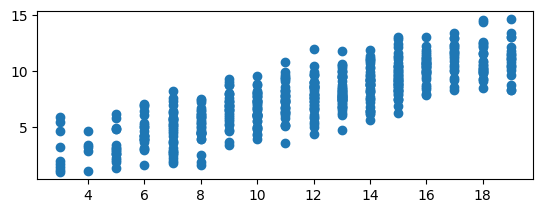

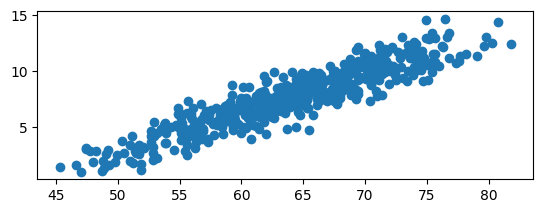

In [165]:
plt.subplot(2, 1, 1)
plt.scatter(df['Age'], df['LungCap'])
plt.show()
plt.subplot(2, 1, 2)
plt.scatter(df['Height'], df['LungCap'])
plt.show()

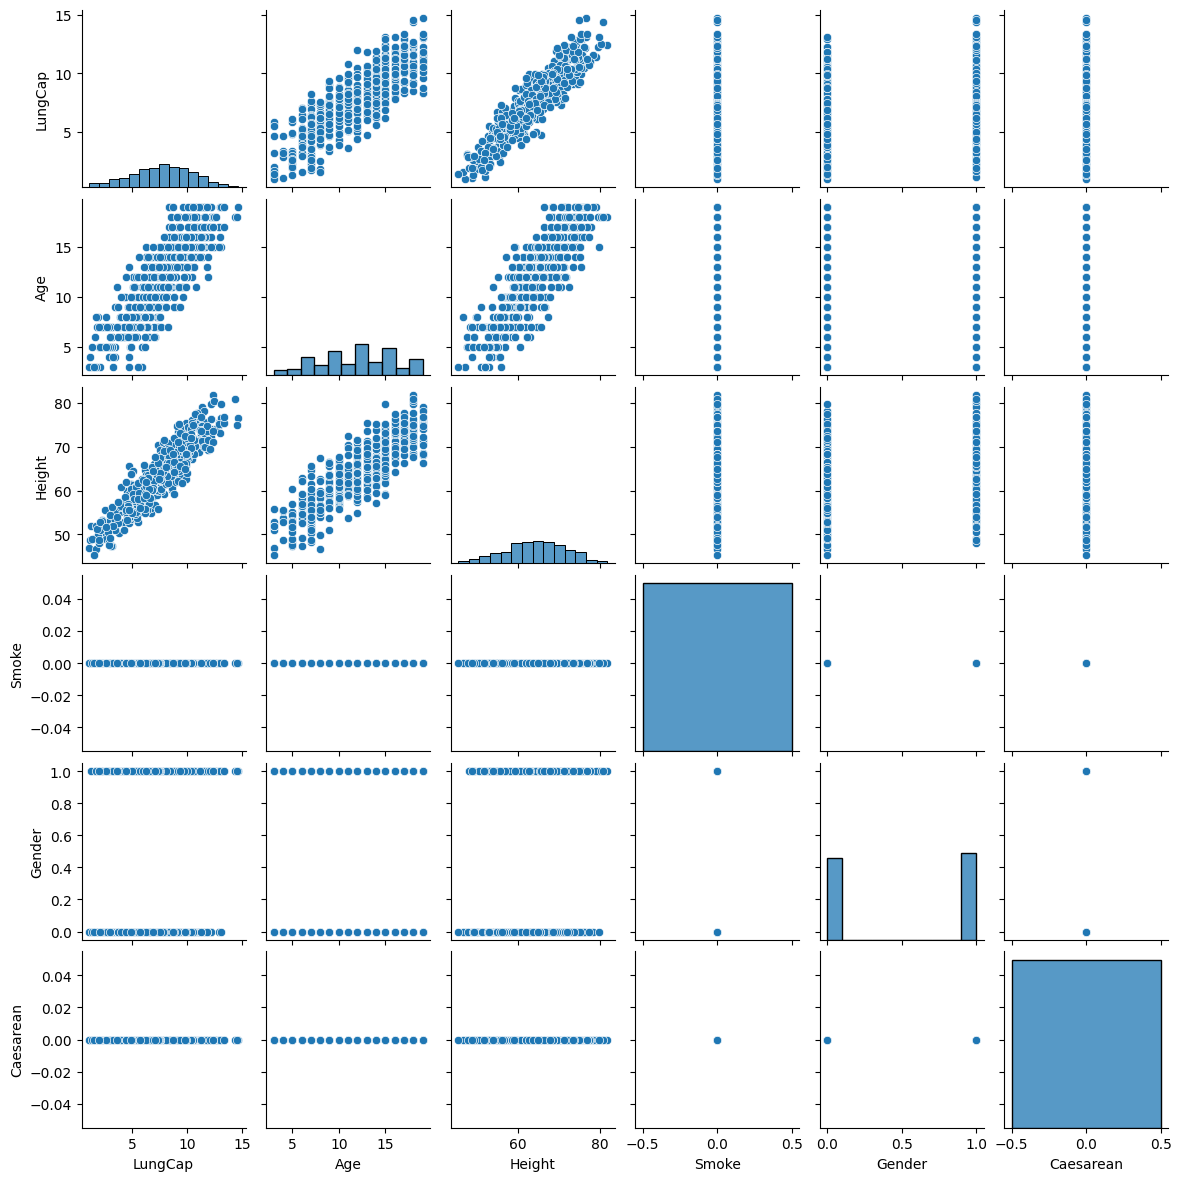

In [166]:
sns.pairplot(data = df, height = 2)

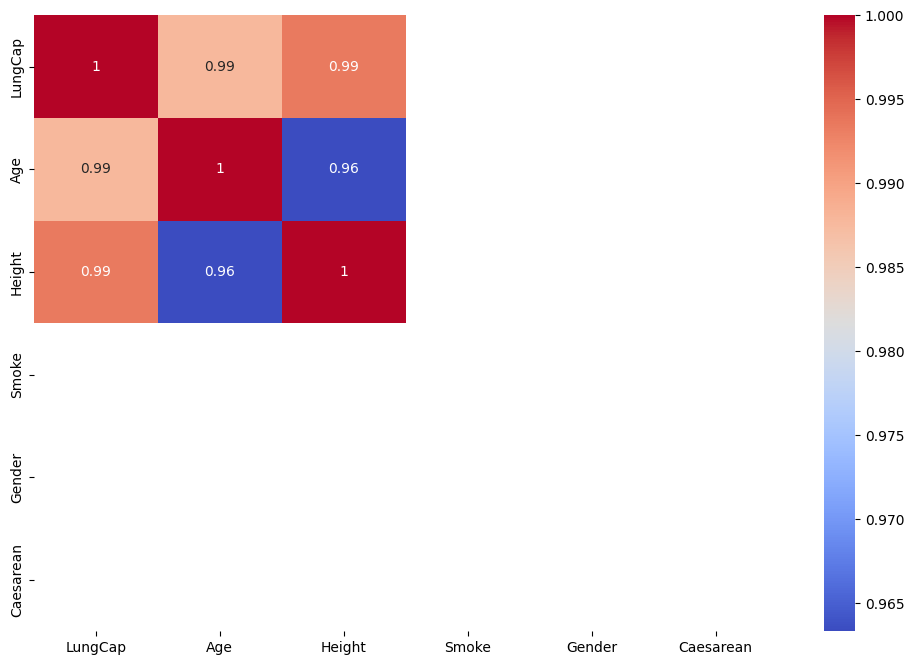

In [167]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[0:3].corr(), annot = True, cmap = "coolwarm")
plt.show()

### Clearly, the above plots suggest that a linear regression model is the best fit option

## Modelling

### Initializing the linear regression model

In [168]:
model = LinearRegression()

### Training the model

In [169]:
model.fit(X_train, Y_train)

LinearRegression()

### Testing the model

In [170]:
Y_predict = model.predict(X_test)

### Evaluating the model

### Scoring the model.

In [171]:
mse = mean_squared_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.16915909011276
R-squared: 0.8349393744806806


A fairly acceptable score is obtained

### Plotting the residual plot.

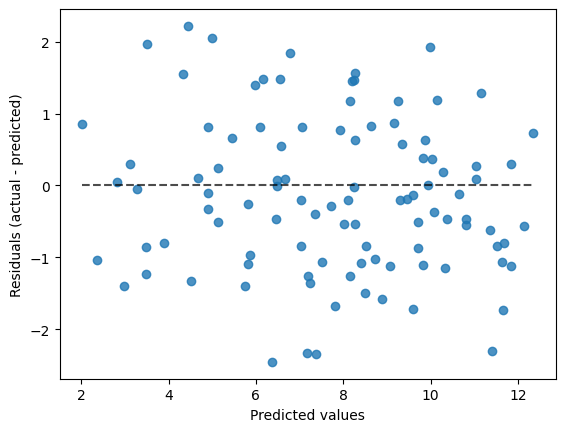

In [172]:
display = PredictionErrorDisplay(y_true = Y_test, y_pred = Y_predict)
display.plot()
plt.show()

Since the residual plot is randomized and unpredictable (i.e. no pattern is observed), it is a fairly accurate model.

### The weights of my model are below


In [173]:
print(model.coef_)
print(model.intercept_)

[0.15195551 0.27423779 0.         0.35800387 0.        ]
-11.81483736451349


## To test my model

To test my model against a test dataset, simply add the file in the repo, and read it as below and predict and score it.

In [ ]:
test = pd.read_csv('Your_Test_Dataset.csv')
test_predict = model.predict(test[1:])
mse_test = mean_squared_error(test[0], test_predict)
r2_test = r2_score(test[0], test_predict)
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')